# Exercises week 9

## Exercise 1: Web server

A web server waits for some user requests. The server receives on average 10 requests per hour, and users send requests independently of each other, there is no coordination between users and a request is equally likely to arrive at any moment.

1. Write a python function that simulates the waiting time (in minutes) until the first request arrives.
2. Plot a histogram of the waiting times for 10^4 simulations.
3. What is the average waiting time across the simulations?
4. Given that the server has already been waiting for 30 minutes for a request, simulate the remaining waiting time until the first request arrives. Plot the histogram and compare to the histogram in question 2.

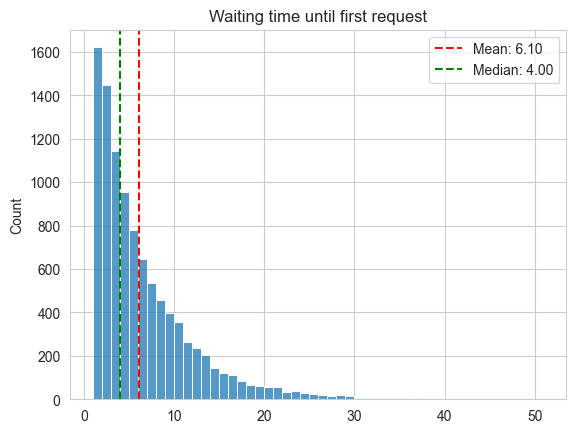

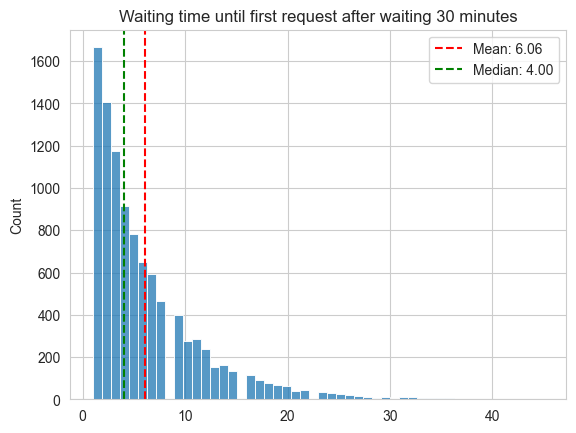

In [14]:
import math

import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

def simulate_waiting_time(rate_per_hour: int = 10) -> int:
    rate_per_minute = rate_per_hour / 60
    waiting_time = 0
    probability_of_request = rate_per_minute
    request = False
    while not request:
        waiting_time += 1
        request = random.uniform(0, 1) < probability_of_request
    return waiting_time

def run_simulations(num_simulations: int = 10000, rate_per_hour: int = 10):
    waiting_times = [simulate_waiting_time(rate_per_hour) for _ in range(num_simulations)]
    return waiting_times

def run_simulations_given_waiting_time(already_waited_minutes: int, num_simulations: int = 10000, rate_per_hour: int = 10):
    waiting_times = []
    i = 0
    while i < num_simulations:
        waiting_time = simulate_waiting_time(rate_per_hour)
        if waiting_time > already_waited_minutes:
            waiting_times.append(waiting_time - already_waited_minutes)
            i += 1
    return waiting_times

def plot_hist_with_median_and_mean(values, title):
    mean_val = sum(values) / len(values)
    median_val = np.median(values)

    sns.histplot(values, bins=50)
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.title(title)
    plt.legend()
    plt.show()

waiting_time_min = run_simulations()
plot_hist_with_median_and_mean(waiting_time_min, 'Waiting time until first request')

waiting_time_min = run_simulations_given_waiting_time(30)
plot_hist_with_median_and_mean(waiting_time_min, 'Waiting time until first request after waiting 30 minutes')

## Exercise 2: Darts

Alice throws a dart at a circular dartboard with radius 1. She always hits the board, and all positions on the board are equally likely.

1. Write a python function that simulates a single dart throw and returns the (x,y) coordinates of the hit on the dartboard.
2. Simulate 10^4 dart throws and plot:
    - the points on a scatter plot,
    - the histogram of the x-coordinates, and
    - the histogram of the y-coordinates.
3. Are the x and y coordinates uniformly distributed?
4. Keep only the throws where the y coordinate is close to 0.5 (e.g., between 0.48 and 0.52). Plot the histogram of the x-coordinates for these throws. What distribution does X follow given that Y is around 0.5?

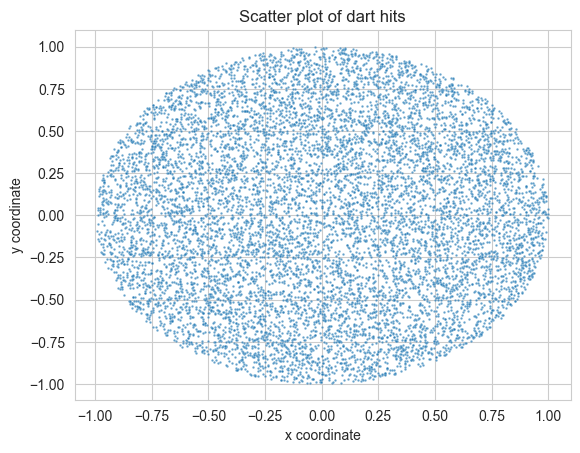

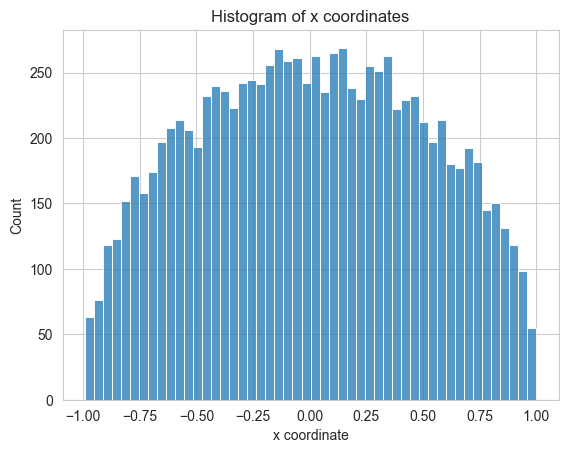

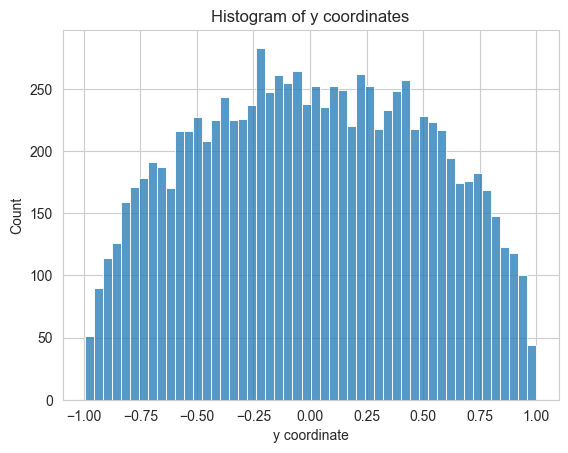

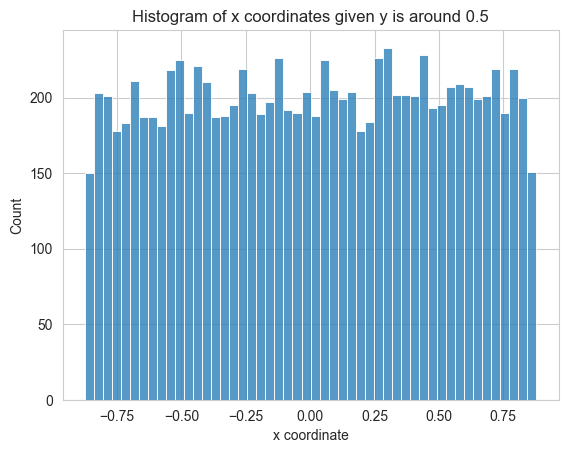

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def simulate_dart_throw():
    valid_point = None
    while not valid_point:
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            valid_point = (x, y)
    return valid_point

def run_simulations(num_simulations: int = 10000) -> list[tuple[float, float]]:
    dart_hits = [simulate_dart_throw() for _ in range(num_simulations)]
    return dart_hits

def run_simulations_given_y(y_min: float, y_max: float, num_simulations: int = 10000) -> list[tuple[float, float]]:
    dart_hits = []
    i = 0
    while i < num_simulations:
        hit = simulate_dart_throw()
        if y_min <= hit[1] <= y_max:
            dart_hits.append(hit)
            i += 1
    return dart_hits

dart_hits = run_simulations()
x_coords = [hit[0] for hit in dart_hits]
y_coords = [hit[1] for hit in dart_hits]

sns.scatterplot(x=x_coords, y=y_coords, alpha=0.7, s=3)
plt.title('Scatter plot of dart hits')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

sns.histplot(x_coords, bins=50)
plt.title('Histogram of x coordinates')
plt.xlabel('x coordinate')
plt.show()

sns.histplot(y_coords, bins=50)
plt.title('Histogram of y coordinates')
plt.xlabel('y coordinate')
plt.show()

dart_hits_given_y = run_simulations_given_y(0.48, 0.52)

sns.histplot([hit[0] for hit in dart_hits_given_y if 0.48 <= hit[1] <= 0.52], bins=50)
plt.title('Histogram of x coordinates given y is around 0.5')
plt.xlabel('x coordinate')
plt.show()

### Exercise 3: Exams and scores

Students take an exam in an online public course. Each question is graded independently and the score on a single question is a random integer between 0 and 5, where all values are equally likely. The final score is the average score over all questions.

1. Write a function that simulates the final score of a student given n questions.
2. Simulate the final score of 10000 students for n = 5, 10, 20 and plot the histogram of the final scores for each n.
3. Plot the histogram of the scores on an individual question. What distribution do the scores on individual questions follow?

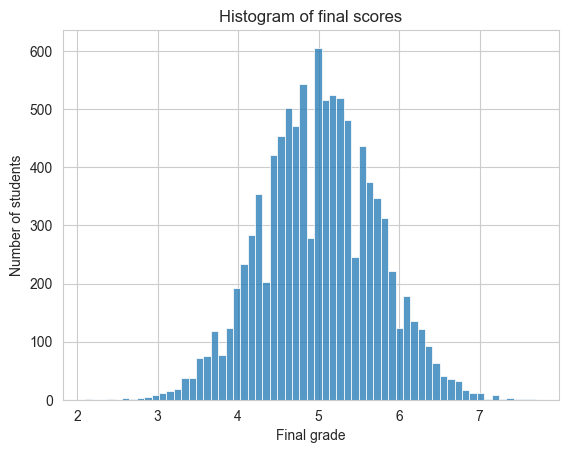

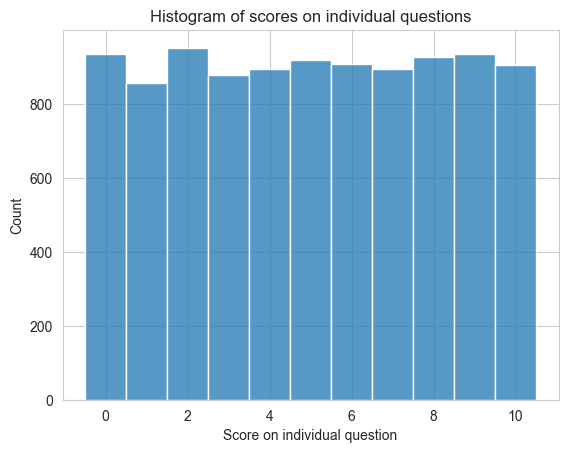

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def simulate_exam(num_questions: int) -> dict:
    question_scores = [random.randint(0, 10) for _ in range(num_questions)]
    average_score = sum(question_scores) / num_questions

    return {'question_scores': question_scores, 'final_score': average_score}

def run_simulations(n_questions: int, n_students: int) -> list[dict]:
    exam_results = [simulate_exam(n_questions) for _ in range(n_students)]
    return exam_results

n_questions = 20
exam_results = run_simulations(n_questions, 10000)
final_scores = [result['final_score'] for result in exam_results]
sns.histplot(final_scores, discrete=False)
plt.title(f'Histogram of final scores')
plt.xlabel('Final grade')
plt.ylabel('Number of students')
plt.show()

exam_results = [simulate_exam(1) for _ in range(10000)]
question_scores = [result['question_scores'][0] for result in exam_results]
sns.histplot(question_scores, discrete=True)
plt.title('Histogram of scores on individual questions')
plt.xlabel('Score on individual question')
plt.show()




### Exercise 4: The birthday problem

1. Write a function that simulates the birthdays of n people. Assume that there are 356 possible birthdays (ignore leap years) and that all birthdays are equally likely.
2. Write a function that checks if there is a shared birthday among the n people.
2. For a fixed number of people (n=10, 50, 100), write a function that estimates the probability of a shared birthday by running many simulations (n_simulations=10000).
3. Plot the estimated probability of a shared birthday as a function of the number of people for n = 1, 2, ..., 100.
4. Compute the solution analytically and plot together with the estimated probabilities. How good is the estimation?

Estimated probability of shared birthday for 10 people: 0.1110
Estimated probability of shared birthday for 50 people: 0.9760
Estimated probability of shared birthday for 100 people: 1.0000


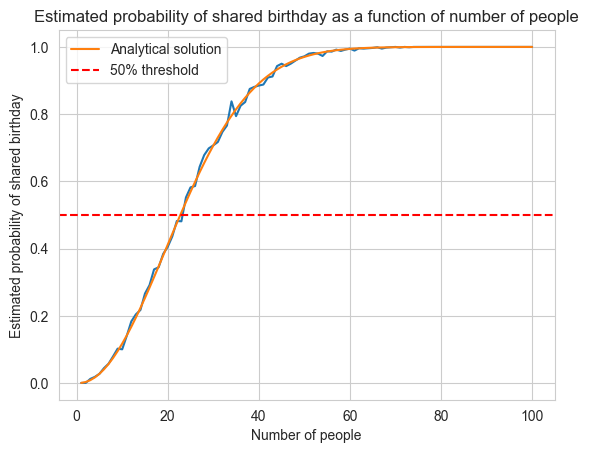

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def simulate_birthdays(num_people: int) -> list[int]:
    return [random.randint(1, 365) for _ in range(num_people)]

def has_shared_birthday(birthdays: list[int]) -> bool:
    return len(set(birthdays)) < len(birthdays)

def estimate_shared_birthday_probability(num_people: int, num_simulations: int) -> float:
    shared_birthday_count = [has_shared_birthday(simulate_birthdays(num_people)) for _ in range(num_simulations)]
    return sum(shared_birthday_count) / num_simulations

for n in [10, 50, 100]:
    probability = estimate_shared_birthday_probability(n, 1000)
    print(f"Estimated probability of shared birthday for {n} people: {probability:.4f}")

ns = list(range(1, 101))
probabilities = [estimate_shared_birthday_probability(n, 1000) for n in ns]

# Analytical solution: P(shared birthday) = 1 - P(no shared birthday) = 1 - (365/365 * 364/365 * ... * (365-n+1)/365) = 1 - (365! / (365^n * (365-n)!))
probabilities_analytical = [1 - math.factorial(365) / (365**i * math.factorial(365-i)) for i in range(1, 101)]

sns.lineplot(x=ns, y=probabilities)
sns.lineplot(x=ns, y=probabilities_analytical, label='Analytical solution')
plt.title('Estimated probability of shared birthday as a function of number of people')
plt.xlabel('Number of people')
plt.ylabel('Estimated probability of shared birthday')
plt.axhline(0.5, color='r', linestyle='--', label='50% threshold')
plt.legend()
plt.show()